<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [1]:
import numpy as np
np.random.random(3)

array([0.56174922, 0.07065496, 0.20120522])

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(42)

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [4]:
def f(x):
  """
  :param x: np.array(np.float) размерности 2
  :return: np.float
  """
  return np.sum(np.sin(x)**2, axis=0)

Обратите внимание, что $x$ - numpy-array размерности 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [5]:
def grad_f(x): 
  """
  Градиент функциии f, определенной выше.
  :param x: np.array(np.float) размерности 2
  :return: np.array(np.float) размерности 2
  """
  return np.array([np.sum(np.sin(2*x[0]), axis=0) , np.sum(np.sin(2*x[1]), axis=0)]) #YOUR CODE 

In [6]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
    
    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []
    
    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        # не забудьте про lr!
        curr_x -= lr * grad_f(curr_x) #  YOUR CODE
        
        
    return np.vstack(history)

In [7]:
steps = grad_descent_2d(f, grad_f, lr=0.4, num_iter=20)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

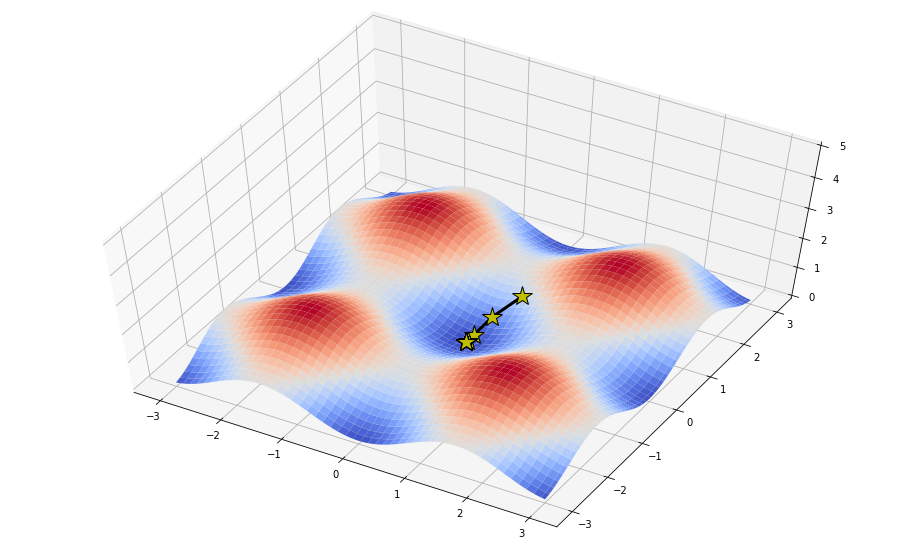

In [8]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, f([X, Y]), cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

#### Задание 1.
Запустите Вашу функцию grad_descent c параметрами lr=0.3, num_iter=20 и начальными приближениями  cur_x1, cur_x2 = 1.5, -1.


In [9]:
steps = grad_descent_2d(f, grad_f, lr=0.3, num_iter=20, x0 = ([1.5, -1])
 )
np.sum(steps[-1]) * 10**6

5.847461018344129

### 2. Linear Regression

В данном пункте мы реализуем метод градиентного спуска для задачи регрессии


$$Y = X*W + \vec{b} + \varepsilon$$

Обратите внимание, что Y - матрица размера $[n\_samples, n\_targets]$, т.е. для каждого объекта мы будем предсказывать не 1 число, а $n\_targets$ чисел. Такая модель будет полезна в будущем, когда вы столкнетесь с полносвязным слоем в нейронных сетях

In [10]:
X, Y = datasets.make_regression(n_targets=3, n_features=2, noise=10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

*Напоминание*

Для отыскания значения параметров мы будем минимизировать *MSE*

$Q(X,Y,W) = \frac{1}{n}\|Y - X*W\|_2^2$

где $n$ - количество элементов выборки

В градиентном спуске на следующем шаге значения параметров получаются из значений на текущем шаге смещением в сторону антиградиента функции потерь:

$$W_{(k+1)} = W_{(k)} - \eta_k \nabla Q(W_{(k)}),$$
где $\eta_t$ — длина шага (learning rate).

Градиент в случае MSE выглядит следующим образом:

$$\nabla Q(W) = \frac{2}{n}X^T(X*W - Y)$$

!!У нас есть несколько переменных, чтобы получить MSE нужно посчитать сумму квадратов ошибок и поделить на n, а не на nk, где n - размер выборки, а k - количество фичей, для MAE так же!!


In [11]:
class LinearRegression:
        def __init__(self, l_p_metric=2, seed=42):
            """
            :param l_p_metric: Задаёт метрику для оптимизации.
            Значение 1 соответсвует MAE, 2 — MSE.
            :param seed: radom_seed для случайной инициализации весов
            """
            # Используйте np.linalg.norm
            if l_p_metric == 2:
                self.metric = lambda preds, y:  np.sum((preds - y)**2)/len(y)
            else:
                self.metric = lambda preds, y:  np.sum(np.abs(preds - y))/len(y)
            self.metric = lambda preds, y: np.mean(np.linalg.norm(preds - y, axis=1, ord=l_p_metric)**l_p_metric)
            self.seed = seed

            self.W = None
            self.b = None

        def init_weights(self, input_size, output_size):
            """
            Инициализирует параметры модели
            :param W: - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
            :param b: - вектор размерности (1, output_size)
            инициализируется нулями
            """
            np.random.seed(self.seed)
            self.W = np.array([[np.random.normal(loc=0, scale=0.01) for i in range(output_size)]
                               for x in range(input_size)]) # YOUR_CODE
            self.b = np.array([0 for x in range(output_size)], dtype='float64')
           
        def fit(self, X, y, num_epochs=1000, lr=0.001):
            """
            Обучение модели линейной регрессии методом градиентного спуска
            :param X: размерности (num_samples, input_shape)
            :param y: размерности (num_samples, output_shape)
            :param num_epochs: количество итераций градиентного спуска
            :param lr: шаг градиентного спуска
            :return metrics: вектор значений метрики на каждом шаге градиентного
            спуска. Метрика контролируется параметром l_p_metric в конструкторе
            """
            self.init_weights(X.shape[1], y.shape[1])
            metrics = []
            for _ in range(num_epochs):
                #if(_ == 0):
                #   self.b = np.array([self.b for i in range(y.shape[0])]) #IT'S WRONG CHANGE MEEEEEEEEE
                preds = self.predict(X)
                # сделайте вычисления градиентов без циклов,
                # используя только numpy

                b_grad =  (2/len(y)) * (preds - y)
                W_grad = (2/len(y)) * X.T @ (X @ self.W + self.b - y)

                #print(f'X = {X.shape} W = {self.W.shape} b = {self.b.shape} y = {y.shape} W_grade = {W_grad.shape}')
                #print(f'b_grad = {b_grad.shape} self.b = {self.b.shape} ')

                self.W -= lr * W_grad
                #print(f'self.W.shape = {self.W.shape}')

                self.b -= lr * b_grad.sum(axis=0)
                metrics.append(self.metric(preds, y))
            return metrics

        def predict(self, X):
            """
            Думаю, тут все понятно. Сделайте свои предсказания :)
            """
            #print(f'X.shape = {X.shape}  self.W.shape = {self.W.shape} self.b.shape = {self.b.shape} stop')
            return  X @ self.W + self.b#  YOUR_CODE

In [12]:
model = LinearRegression()
mse = model.fit(X_train, Y_train)

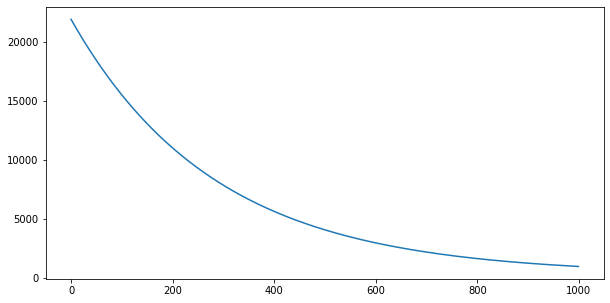

In [13]:
# Постройте график для MSE
#YOUR_CODE
plt.figure(figsize=(10, 5))
plt.plot(mse)
plt.show()

#### Задание 2.

1. Зафиксируйте `random.seed == 42`
2. Сгенерируйте данные с помощью `make_regression` с параметами `n_targets=3, n_features=2, noise=10, random_state=42`. С помощью `train_test_split` разделите данные на обучение и тест 
3. Обучите модель линейной регрессии с параметрами по умолчанию.

####  Задание 3.

1. Обучите модель линейной регрессии на тех же данных. В этот раз считайте MAE

### Логистическая регрессия

Теперь будем решать задачу классификации при помощи логистической регрессии

In [14]:
X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

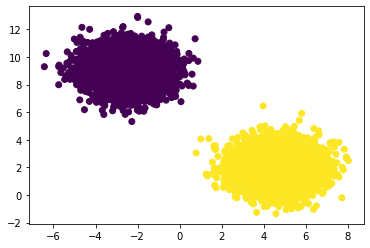

In [15]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0])
plt.show()

Небольшое напоминание по логистической регрессии:

Сигмоида
$$ \sigma(h) = \frac{1}{1 + exp(-h)} $$

Вероятность принадлежности к классу

$$ P(y = 1 | x, w) = \sigma(x, w) $$

Логистическая функция потерь

$$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

## Логистическая регрессия
Для вывода логической регрессии удобнее рассматривать бинарную классификацию, где метки классов лежат во множестве $\{0, 1\}$. 

Задачу обучения логистической регрессии можно записать следующим образом:

$$ L(y, p)  \to \min_w$$

Обучение в данном случае сводится к нахождению параметров модели $w$, которое производится с помощью метода градиентного спуска (Gradient Descent, GD). 

Градиентный шаг будет заключаться в обновлении вектора весов по следующей формуле:

$$w := w - \eta X^T (p - y)$$

где $\eta > 0$ — размер шага (learning rate).


In [16]:
class LogisticRegressionGD:
    '''
    A simple logistic regression for binary classification with gradient descent
    '''
    
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        """
            Данный метод должен возвращать следующую матрицу:
            X_ext = [1, X], где 1 - единичный вектор
            это необходимо для того, чтобы было удобнее производить
            вычисления, т.е., вместо того, чтобы считать X@W + b
            можно было считать X_ext@W_ext 
        """
        
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        self.W = np.random.normal(0, 0.01, (input_size, output_size))
        
    def get_loss(self, p, y):
        """
            Данный метод вычисляет логистическую функцию потерь
            @param p: Вероятности принадлежности к классу 1
            @param y: Истинные метки
        """
        p = np.append(1-p, p, axis = 1)
        y = np.append(1-y, y, axis = 1)
        
        return -(2*y*np.log(p)).mean()

    
    def get_prob(self, X):
        """
            Данный метод вычисляет P(y=1|X,W)
            Возможно, будет удобнее реализовать дополнительный
            метод для вычисления сигмоиды
        """
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return 1/(1 + np.exp(-X.dot(self.W)))
    
    
    def get_acc(self, p, y, threshold=0.5):
        """
            Данный метод вычисляет accuracy:
            acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
               
        return (y == (p >= threshold)).mean()
    
    
    def fit(self, X, y, num_epochs=100, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        losses1 = []
        for _ in range(num_epochs):
            p = self.get_prob(X)
            
            W_grad = (X.T @ (p-y)) / y.shape[0]
            self.W -= lr*W_grad
            
            # необходимо для стабильности вычислений под логарифмом
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            log_loss = self.get_loss(p, y)
            
            losses.append(log_loss)
            acc = self.get_acc(p, y)
            accs.append(acc)
        
        return accs, losses

In [17]:
model = LogisticRegressionGD()
accs, losses = model.fit(X_train, y_train)

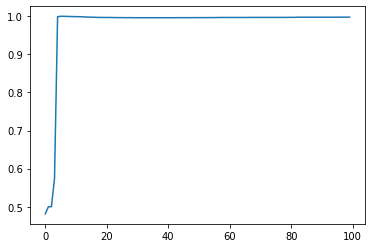

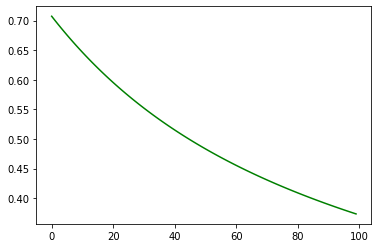

In [18]:
# Постройте графики для accuracy и для loss
#YOUR_CODE
plt.plot(accs)
plt.show()
plt.plot(losses, 'g')
plt.show()

#### Задание 4

1. Реализуйте все методы класса `LogisticRegressionGD`
2. Создайте модель и обучите ее с параметрами по умолчанию на train данных
3. по полученным `accs` и  `losses` посчитайте среднее.
4. Посчитайте accuracy на test данных. `threshold=0.5`.

### Logistic regresion with SGD

Сложность вычисления в случае с GD $O(kn)$, где $k$ - размер вектора признаков, $n$ - размер всей выборки.
В случае, когда выборка очень большая, это решение становится непрактичным

GD заменяют на SGD - *Стохастический градиентный спуск*. Он отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится  $O(kl)$ , где  $l$  — количество объектов, по которым оценивается градиент,  $l << n$.

In [19]:
def batch_generator(X, y, batch_size=100):
    """
        Необходимо написать свой генератор батчей.
        Если вы не знаете, что такое генератор, то, возможно,
        вам поможет
        https://habr.com/ru/post/132554/
        В данном генераторе не надо перемешивать данные
    """
    num_samples = X.shape[0]
    # Заметьте, что в данном случае, если num_samples не делится на batch_size,
    # то последние элементы никогда не попадут в обучение
    # в данном случае нас это не волнует
    num_batches = num_samples // batch_size
    for i in range(num_batches-1):
        # Необходимо отдать batch_size обьектов и соответствующие им target
        yield (X[i*batch_size:batch_size*(i+1)],y[i*batch_size:batch_size*(i+1)])

class LogisticRegressionSGD:  
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        """
            Данный метод должен возвращать следующую матрицу:
            X_ext = [1, X], где 1 - единичный вектор
            это необходимо для того, чтобы было удобнее производить
            вычисления, т.е., вместо того, чтобы считать X@W + b
            можно было считать X_ext@W_ext 
        """
        
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        self.W = np.random.normal(0, 0.01, (input_size, output_size))
        
    def get_loss(self, p, y):
        """
            Данный метод вычисляет логистическую функцию потерь
            @param p: Вероятности принадлежности к классу 1
            @param y: Истинные метки
        """
        p = np.append(1-p, p, axis = 1)
        y = np.append(1-y, y, axis = 1)
        
        return -(2*y*np.log(p)).mean()

    
    def get_prob(self, X):
        """
            Данный метод вычисляет P(y=1|X,W)
            Возможно, будет удобнее реализовать дополнительный
            метод для вычисления сигмоиды
        """
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return 1/(1 + np.exp(-X.dot(self.W)))
    
    
    def get_acc(self, p, y, threshold=0.5):
        """
            Данный метод вычисляет accuracy:
            acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
               
        return (y == (p >= threshold)).mean()
    
    
    def fit(self, X, y, num_epochs=10, lr=0.001):

        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])

        accs = []
        losses = []
        for _ in range(num_epochs):
            gen = batch_generator(X, y)
            for X_, y_ in gen:
                p = self.get_prob(X_)

                W_grad = (X_.T @ (p-y_)) / y_.shape[0]
                self.W -= lr * W_grad

                # необходимо для стабильности вычислений под логарифмом
                p = np.clip(p, 1e-10, 1 - 1e-10)

                log_loss = self.get_loss(p, y_)
                losses.append(log_loss)
                acc = self.get_acc(p, y_)
                accs.append(acc)

        return accs, losses

In [20]:
model = LogisticRegressionSGD()
accs, losses = model.fit(X_train, y_train)

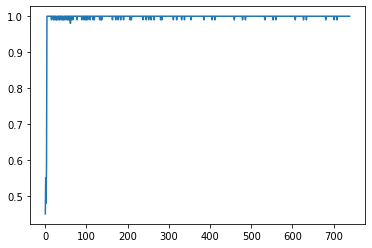

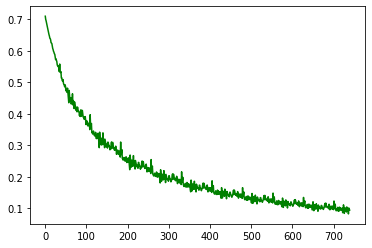

In [21]:
# Постройте графики для accuracy и для loss
#YOUR_CODE
plt.plot(accs)
plt.show()
plt.plot(losses, 'g')
plt.show()

В данном случае модель тренируется значительно дольше, чем c *Gradient Decent*. Попробуйте объяснить, почему так происходит

#### Задание 5

1. Реализуйте все методы класса `LogisticRegressionSGD`
2. Создайте модель и обучите ее с параметрами по умолчанию на train данных
3. по полученным `accs` и  `losses` посчитайте среднее. 
4. Посчитайте accuracy на test данных. `threshold=0.5`. 